# 2-1

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
def mykde(X,h):
    if X.ndim == 1:
        def estimator(input_var):
            kernel=0
            for x in X:
                if(abs(input_var-x)<=h/2):
                    kernel+=1
            return kernel/len(X)/h
        return estimator, (min(X), max(X))
    if X.ndim == 2:
        def estimator(input_var):
            kernel=0
            for x in X:
                if(np.linalg.norm(input_var-x)<=h/2):
                    kernel+=1
            return kernel/len(X)/h/h
        return estimator, [[min(X[:,0]), max(X[:,0])],[min(X[:,1]), max(X[:,1])]]

In [78]:
def kde_hist(X,estimator, domain,h):
    x=np.linspace(domain[0],domain[1],len(X))
    y=[estimator(value) for value in x]
    fig=plt.figure()
    ax1=fig.add_subplot()
    ax1.hist(X, bins = 100)
    ax1.set_xlabel('x')
    ax1.set_ylabel('Frequency',color='b')
    
    ax2=ax1.twinx()
    ax2.plot(x,y,color='r')
    ax2.set_ylabel('Estimated Density',color='r')
    plt.title(f'Hostogram and Estimated Density with KDE (h: {h})')
    plt.show()    

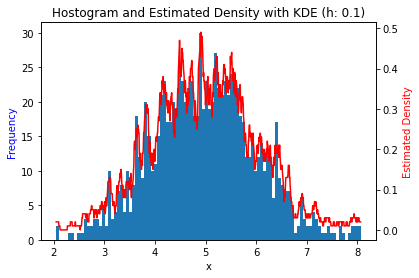

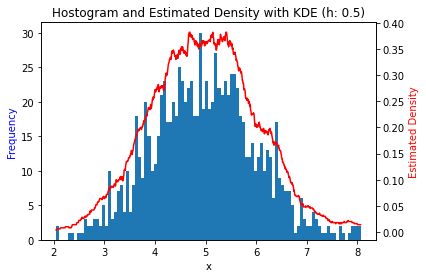

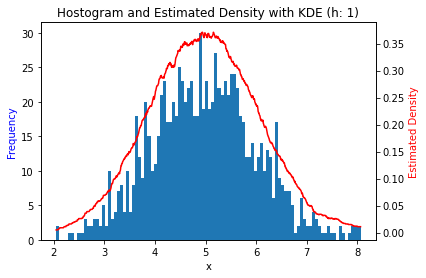

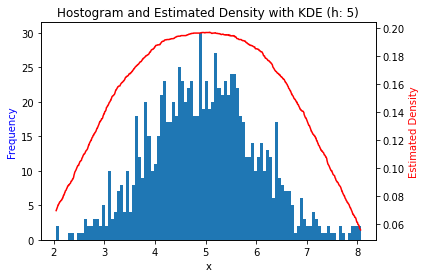

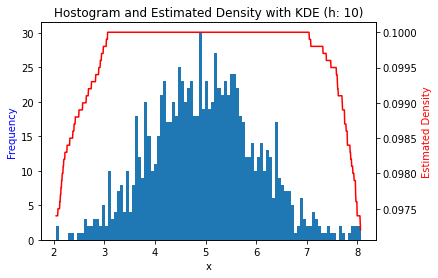

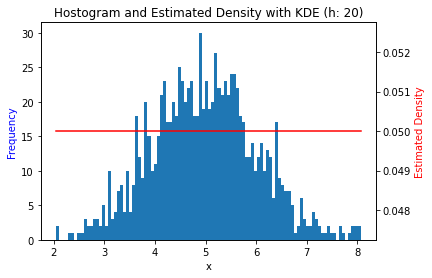

In [41]:
X=np.random.normal(5,1,1000)
for h in [0.1,0.5,1,5,10,20]:
    kde, domain=mykde(X,h)
    kde_hist(X,kde,domain,h)
    

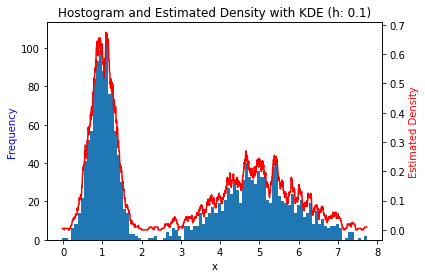

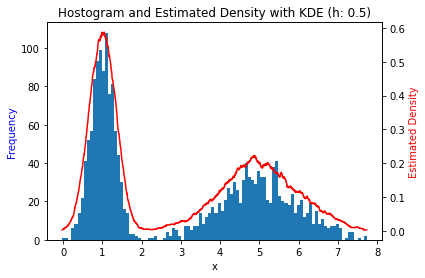

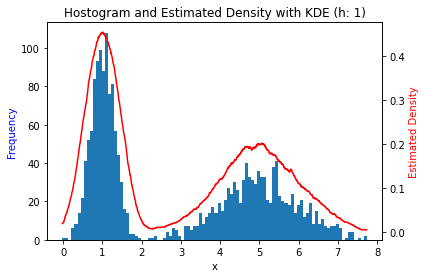

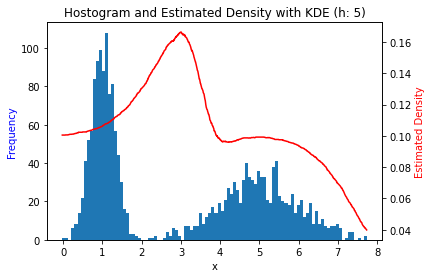

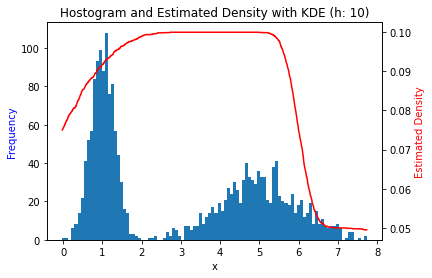

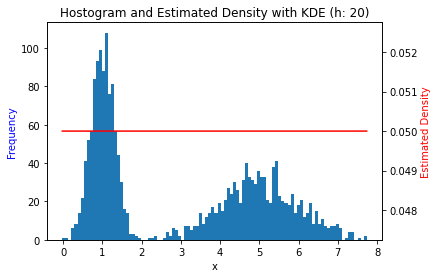

In [42]:
X=np.random.normal(5,1,1000)
X_=np.random.normal(1,0.3,1000)
X=np.concatenate([X,X_])
for h in [0.1,0.5,1,5,10,20]:
    kde, domain=mykde(X,h)
    kde_hist(X,kde,domain,h)

# 2-2

In [77]:
X=np.random.multivariate_normal([1,0], [[0.9, 0.4],[0.4, 0.9]], 500)
X_=np.random.multivariate_normal([0,2.5], [[0.7, 0.4],[0.4, 0.3]], 500)
X=np.concatenate([X,X_])
X

array([[ 0.6602593 ,  0.35813311],
       [ 1.7159982 ,  0.75890114],
       [ 0.5233833 , -0.04586024],
       ...,
       [-0.66837239,  1.84725863],
       [-0.1533671 ,  2.13143122],
       [ 0.59628096,  3.09110836]])

In [82]:
max(X[:,0])

3.7318397913126886

In [108]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt

def kde_hist_2d(X,estimator, domain,h):
    x=np.linspace(domain[0][0],domain[0][1],100)
    y=np.linspace(domain[1][0],domain[1][1],100)
    xx, yy=np.meshgrid(x,y)
    z=np.array([[estimator((x_,y_)) for x_ in x] for y_ in y])
    fig=plt.figure()
    ax1=Axes3D(fig)
    ax1.plot_surface(xx,yy,z,cmap=plt.cm.viridis, cstride=1,rstride=1)
    plt.show()
    

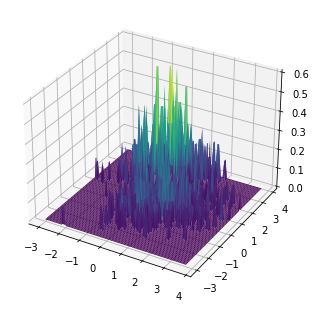

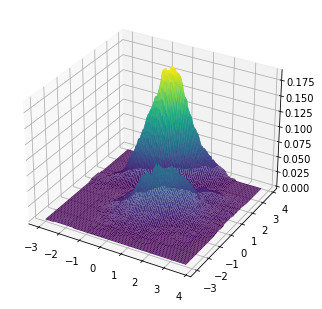

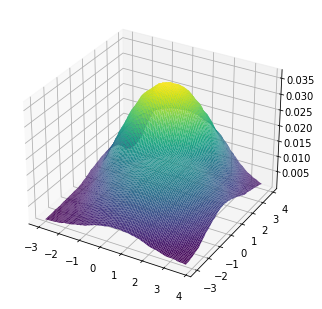

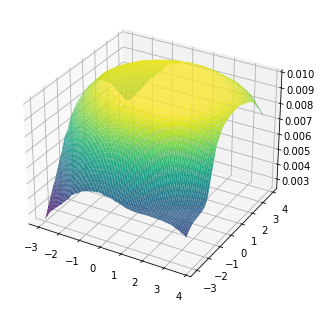

In [110]:
for h in [0.1, 1,5,10]:
    kde, domain=mykde(X,h)
    kde_hist_2d(X,kde,domain,h)

In [65]:
int(sqrt(50000))

223